In [1]:
debug = 1
city = "Pittsburgh" # Possible values: Baltimore, Washington DC, Detroit, Newark, St. Louis, Richmond, San Francisco, Cleveland, Philadelphia, Pittsburgh
g = 0


check_tract_and_city_boundaries = True
check_tract_consistency = True
show_water = True

print('Importing packages...')
import os
import pandas
import numpy as np
import time
#import zipfile
import geopandas
from pprint import pprint
from matplotlib import pyplot as plt
from shapely.ops import unary_union
from shapely.geometry import Point

pandas.set_option('display.max_colwidth', -1)


# Directories to look in
thisdir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/'
data_dir = '/home/idies/workspace/Temporary/raddick/cra_scratch_final/'
jobs_dir = data_dir + 'lodes_wac/'

#census_dir = data_dir + 'acs5/'

output_data_dir = thisdir + 'final_data/'
#baltimore_dir = thisdir + 'baltimore/'

census_shapefile_tiger_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/shapefiles/'

#shapefile_dir = census_shapefile_tiger_basedir + '{0:.0f}/TRACT/'.format(thisyear)

acs5_basedir = '/home/idies/workspace/Temporary/raddick/census_scratch/acs5/'

code_lookup_dir = thisdir + 'code_guide_lookups/'
inflation_dir = '/home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act/datasets/inflation/'
extrasdir = '/home/idies/workspace/Storage/raddick/census/extras/'

city_data_dir = thisdir + 'city_data/'
scale = 1


os.chdir(thisdir)
g = 0 # global time

print('Now in directory: {0:}'.format(os.getcwd()))
print('ok')

Importing packages...
Now in directory: /home/idies/workspace/Storage/raddick/Baltimore/community_reinvestment_act
ok


In [2]:
s = time.time()
years = np.arange(2018, 2009, -1)

if (city == 'Baltimore'):
    thestate = 24
    state_abbrev = 'md'
    citycode = 4000
    baltimore_shapefile_dir = '/home/idies/workspace/Storage/raddick/Baltimore/shapefiles/'
    plotlimits = {'N': 39.4, 'S': 39.15, 'E': -76.5, 'W': -76.75}

elif (city == 'Washington DC'):
    thestate = 11   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
    state_abbrev = 'dc'
    citycode = 50000
    plotlimits = {'N': 39.01, 'S': 38.79, 'E': -76.9, 'W': -77.13}

elif (city == 'Detroit'):
    thestate = 26   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
    state_abbrev = 'mi'
    citycode = 22000
    plotlimits = {'N': 42.5, 'S': 42.2, 'E': -82.8, 'W': -83.3}
    
elif (city == 'Newark'):
    thestate = 34
    state_abbrev = 'nj'
    citycode = 51000
    
elif (city == 'St. Louis'):
    thestate = 29   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
    state_abbrev = 'mo'
    citycode = 65000
    plotlimits = {'N': 38.8, 'S': 38.5, 'E': -90.1, 'W': -90.4}
#    cityname_file = 'st_louis'
    
elif (city == 'Richmond'):
    thestate = 47   # state_codes_df[state_codes_df['STATE_NAME'] == 'Missouri']
    state_abbrev = 'va'
    citycode = 67000
    #thecounty = 760
#    cityname_file = 'richmond'
    
elif (city == 'San Francisco'):
    thestate = 5   # state_codes_df[state_codes_df['STATE_NAME'] == 'California']
    state_abbrev = 'ca'
    #thecounty = 75
    citycode = 67000
    cityname_file = 'san_francisco'
    
elif (city == 'Pittsburgh'):
    thestate = 42
    state_abbrev = 'pa'
    citycode = 61000
    plotlimits = {'N': 40.55, 'S': 40.3, 'E': -79.85, 'W': -80.15}

elif (city == 'Cleveland'):
    thestate = 39
    state_abbrev = 'oh'
    citycode = 16000
    plotlimits = {'N': 41.65, 'S': 41.35, 'E': -81.5, 'W': -81.9}
    
elif (city == 'Philadelphia'):
    thestate = 42
    state_abbrev = 'pa'
    #thecounty = 101
    citycode = 60000
    plotlimits = {'N': 40.15, 'S': 39.85, 'E': -74.93, 'W': -75.3}
else:
    print('ERROR: Select city from list!')

cityname_file = city.lower().replace(' ','_')
e = time.time()
g = g + (e-s)
print('Selected {0:}!'.format(city))

Selected Pittsburgh!


## Do city boundaries line up with census tract boundaries?

Baltimore: Yes
Washington, DC: Yes
Detroit: Yes

Parsing 2018 census tracts and places in pa...
Parsing 2017 census tracts and places in pa...
Parsing 2016 census tracts and places in pa...
Parsing 2015 census tracts and places in pa...
Parsing 2014 census tracts and places in pa...
Parsing 2013 census tracts and places in pa...
Parsing 2012 census tracts and places in pa...
Parsing 2011 census tracts and places in pa...
Parsing 2010 census tracts and places in pa...
reading water files...
	reading water file 1 of 67...
	reading water file 11 of 67...
	reading water file 21 of 67...
	reading water file 31 of 67...
	reading water file 41 of 67...
	reading water file 51 of 67...
	reading water file 61 of 67...
	reading water file 67 of 67...


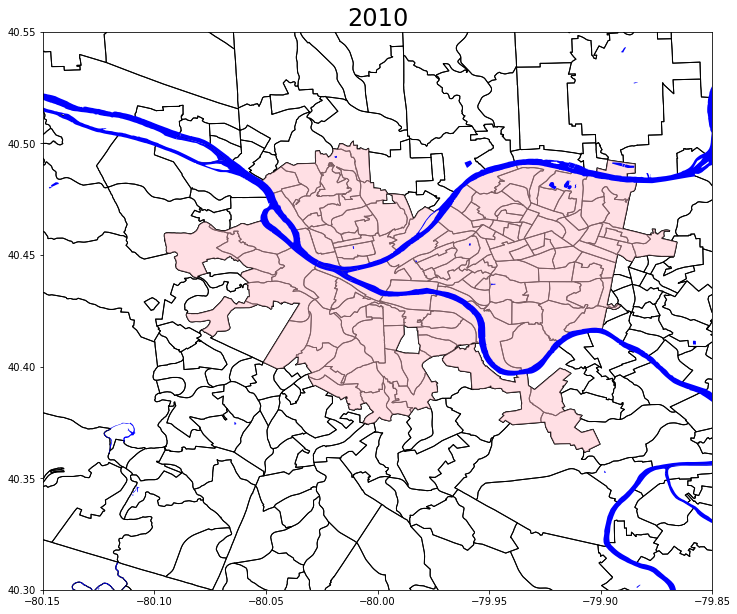



finding census tracts within city boundaries...
doing overlays for 2018...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny overlaps...
doing overlays for 2017...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny overlaps...
doing overlays for 2016...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny overlaps...
doing overlays for 2015...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny overlaps...
doing overlays for 2014...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny overlaps...
doing overlays for 2013...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny overlaps...
doing overlays for 2012...
	overlaying city on state census tract geometries...
	removing boundary tracts that had only tiny ove

In [3]:
s = time.time()

show_year = 2010
overlap_tolerance = 0.1/120000 # overlap_tolerance_square_meters = 0.1   1 sq deg ~ 120,000 sq m at the equator

state_tracts_gdf = pandas.DataFrame()
state_places_gdf = pandas.DataFrame()

for thisyear in years:
    print('Parsing {0:.0f} census tracts and places in {1:}...'.format(thisyear, state_abbrev))

    if (thisyear == 2010):
        state_tracts_this_year_gdf = geopandas.GeoDataFrame()
        state_places_this_year_gdf = geopandas.GeoDataFrame()
        tractfiles = [
            census_shapefile_tiger_basedir+'{0:.0f}/TRACT/'.format(thisyear)+x 
            for x in os.listdir(census_shapefile_tiger_basedir+'{0:.0f}/TRACT/'.format(thisyear)) 
            if (
                (x[-4:] == '.shp')
                and ('tl_{0:.0f}_{1:02d}'.format(thisyear,thestate) in x)
            )
        ]
        placefiles = [
            census_shapefile_tiger_basedir+'{0:.0f}/PLACE/'.format(thisyear)+x 
            for x in os.listdir(census_shapefile_tiger_basedir+'{0:.0f}/PLACE/'.format(thisyear))
            if (
                (x[-4:] == '.shp')
                and 
                ('tl_2010_{0:.0f}'.format(thestate) in x)
            )
        ]

        for i in range (0, len(tractfiles)):
            state_tracts_this_year_gdf = pandas.concat((state_tracts_this_year_gdf, geopandas.read_file(tractfiles[i])), axis=0, sort=False)
        for j in range (0, len(placefiles)):
            state_places_this_year_gdf = pandas.concat((state_places_this_year_gdf, geopandas.read_file(placefiles[j])), axis=0, sort=False)
        tract_new_column_names = []
        for k in state_tracts_this_year_gdf.columns.tolist():
            if ('10' in k):
                tract_new_column_names.append(k[0:-2])
            else:
                tract_new_column_names.append(k)
        place_new_column_names = []
        for m in state_places_this_year_gdf.columns.tolist():
            if ('10' in m):
                place_new_column_names.append(m[0:-2])
            else:
                place_new_column_names.append(m)
        state_tracts_this_year_gdf.columns = tract_new_column_names
        state_places_this_year_gdf.columns = place_new_column_names
    else:
        state_tracts_this_year_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
        state_places_this_year_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))

    state_tracts_this_year_gdf = state_tracts_this_year_gdf.assign(year = thisyear)
    state_places_this_year_gdf = state_places_this_year_gdf.assign(year = thisyear)

    state_tracts_gdf = pandas.concat((state_tracts_gdf, state_tracts_this_year_gdf), axis=0, sort=False)
    state_places_gdf = pandas.concat((state_places_gdf, state_places_this_year_gdf), axis=0, sort=False)

if (check_tract_and_city_boundaries):
    fig, ax = plt.subplots(1,1, figsize=(12,12))

    state_tracts_gdf[state_tracts_gdf['year'] == show_year].plot(color='none', edgecolor='black', ax=ax)
    
    state_places_gdf[
        (state_places_gdf['year'] == show_year) 
        & (state_places_gdf['GEOID'] == '{0:02d}{1:05d}'.format(thestate,citycode))
    ].plot(color='pink', ax=ax, alpha=0.5)#.plot(color='none', edgecolor='red', ax=ax, linewidth=2)#

    if (show_water):
        print('reading water files...')
        water_dir = census_shapefile_tiger_basedir+"{0:.0f}/AREAWATER/".format(show_year)
        water_files = [water_dir+x for x in os.listdir(water_dir) if ('tl_{0:.0f}_{1:02d}'.format(show_year,thestate) in x) and (x[-3:] == 'shp')]
        water_gdf = geopandas.GeoDataFrame()
        for i in range(0, len(water_files)):
            if ((np.mod(i,10) == 0) | (i == len(water_files)-1)):
                print('\treading water file {0:,.0f} of {1:,.0f}...'.format(i+1, len(water_files)))
            water_gdf = pandas.concat((water_gdf, geopandas.read_file(water_files[i])))
        water_gdf.plot(ax=ax, color='blue')

    plt.xlim([plotlimits['W'], plotlimits['E']])
    plt.ylim([plotlimits['S'], plotlimits['N']])
    plt.title('{0:.0f}'.format(show_year), size=24)
    
    plt.show()

print('\n')
print('finding census tracts within city boundaries...')

city_tracts_years_gdf = geopandas.GeoDataFrame()
city_tracts_years_gdf.crs = state_places_gdf.crs

for thisyear in years:
    print('doing overlays for {0:}...'.format(thisyear))
    #print('Parsing {0:.0f} census tracts...'.format(thisyear))
#     state_tracts_gdf = geopandas.read_file(census_shapefile_tiger_basedir +'{0:.0f}/TRACT/tl_{0:.0f}_{1:02d}_tract.shp'.format(thisyear, thestate))
#     state_places_gdf = geopandas.read_file(census_shapefile_tiger_basedir + '{0:.0f}/PLACE/tl_{0:.0f}_{1:.0f}_place.shp'.format(thisyear, thestate))
    print('\toverlaying city on state census tract geometries...')
    year_city_geo_gdf = state_places_gdf[(state_places_gdf['year'] == thisyear) & (state_places_gdf['GEOID'] == '{0:.0f}{1:05d}'.format(thestate, citycode))]
    
    year_city_geo_gdf = year_city_geo_gdf.to_crs(state_tracts_gdf.crs)
    year_city_geo_gdf = year_city_geo_gdf.rename(columns={'NAME': 'city_name'})

    year_city_tracts_gdf = geopandas.overlay(state_tracts_gdf[state_tracts_gdf['year'] == thisyear], year_city_geo_gdf[['city_name', 'geometry']], how='intersection')
    #year_city_tracts_gdf = year_city_tracts_gdf.assign(census_tract = year_city_tracts_gdf['TRACTCE'].apply(lambda x: str(x)[0:4]+'.'+str(x)[4:6]))
    #year_city_tracts_gdf = year_city_tracts_gdf.set_index('GEOID')
#    year_city_tracts_gdf = year_city_tracts_gdf.assign(year = thisyear)
    
    print('\tremoving boundary tracts that had only tiny overlaps...')
    year_city_tracts_gdf = year_city_tracts_gdf[year_city_tracts_gdf.geometry.area >= overlap_tolerance]    

    #city_tracts_years_gdf = city_tracts_years_gdf.append(year_city_tracts_gdf)
    city_tracts_years_gdf = pandas.concat((city_tracts_years_gdf, year_city_tracts_gdf), axis=0, sort=False)


print('converting columns to numeric...')
city_tracts_years_gdf.loc[:, 'COUNTYFP'] = pandas.to_numeric(city_tracts_years_gdf['COUNTYFP'], errors='coerce')
city_tracts_years_gdf.loc[:, 'NAME'] = pandas.to_numeric(city_tracts_years_gdf['NAME'], errors='coerce')

print('getting a list of counties and tracts in this city...')
need_counties_list = city_tracts_years_gdf['COUNTYFP'].drop_duplicates().tolist()
need_tracts_list = city_tracts_years_gdf['NAME'].drop_duplicates().tolist()

# print('setting index...')
city_tracts_years_gdf = city_tracts_years_gdf.set_index(['COUNTYFP', 'NAME', 'year'])
city_tracts_years_gdf = city_tracts_years_gdf.sort_index()

# print('backing up...')
# city_tracts_years_gdf_bk = city_tracts_years_gdf

e = time.time()
g = g + (e-s)
print('Read {0:,.0f} tract-years in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(city_tracts_years_gdf), np.floor((e-s)/60), (e-s)%60))
#city_tracts_years_gdf.plot()


# Ensure that tract boundaries remain constant throughout the years

## Check for duplicated or unique names

In [4]:
s = time.time()
oneyear = 2018
otheryear = 2010

# print('getting from backup...')
# city_tracts_years_gdf = city_tracts_years_gdf_bk

counties_list = city_tracts_years_gdf.index.get_level_values('COUNTYFP').drop_duplicates().tolist()

print('{0:} covers {1:,.0f} county...'.format(city, len(counties_list)))
print(counties_list)

for x in counties_list:
    print('County {0:,.0f} contains {1:,.0f} tract-years:'.format(x, len(city_tracts_years_gdf.reset_index()[city_tracts_years_gdf.reset_index()['COUNTYFP'] == x])))
    for i in years:
        print('{0:.0f}: {1:,.0f} tracts'.format(
            i, 
            len(city_tracts_years_gdf.reset_index()[
                (city_tracts_years_gdf.reset_index()['COUNTYFP'] == x) 
                & (city_tracts_years_gdf.reset_index()['year'] == i)])
        ))
        census_tracts_2018_list = city_tracts_years_gdf.xs(2018, level=-1).reset_index()[
            city_tracts_years_gdf.xs(2018, level=-1).reset_index()['COUNTYFP'] == x].set_index('NAME').index.values.tolist()

        county_x_year_i_census_tracts_list = city_tracts_years_gdf.reset_index()[
                (city_tracts_years_gdf.reset_index()['COUNTYFP'] == x) 
                & (city_tracts_years_gdf.reset_index()['year'] == i)
        ]['NAME'].tolist()
        
        new_census_tracts = []
        missing_census_tracts = []
        
        for n in county_x_year_i_census_tracts_list:
            if (n not in census_tracts_2018_list):
                new_census_tracts.append(n)
            for p in census_tracts_2018_list:
                if (p not in county_x_year_i_census_tracts_list):
                    missing_census_tracts.append(n)
        for y in new_census_tracts:
            print('Found census tract in {0:.0f} that is not present in 2018: {1:}'.format(i,y))
        for z in missing_census_tracts:
            print('Found census tract from 2018 that was not present in {0:.0f}: {1:}'.format(i,z))
        if (len(new_census_tracts) + len(missing_census_tracts) > 0):
            print('\n')


# if (check_tract_consistency):
#     fig, ax = plt.subplots(1,1, figsize=(48*scale,48*scale))
    
#     city_tracts_years_gdf.xs(otheryear, level=-1).plot(ax=ax, color='none', edgecolor='red')
#     city_tracts_years_gdf.xs(oneyear, level=-1).plot(ax=ax, color='none', edgecolor='black')


#     # #city_tracts_years_gdf.loc[[2012, 35, 1711.03]].geometry.plot()#.plot(color='red')
#     for ix, thisrow in city_tracts_years_gdf.xs(otheryear, level=-1).iterrows():
#         if (ix[1] in new_census_tracts):
#             annotator = ix[1]
#             ax.annotate(annotator, 
#                        xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
#                        xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
#                                thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
#                        backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
#                        fontsize=24*scale)

#     plt.xlim([plotlimits['W'], plotlimits['E']])
#     plt.ylim([plotlimits['S'], plotlimits['N']])
#     plt.title('{0:.0f} (black) vs {1:.0f} (red)'.format(oneyear, otheryear), size=24)

#     plt.show()

e = time.time()
g = g + (e-s)
print('Checked consistency of {0:,.0f} tract-years in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(city_tracts_years_gdf), np.floor((e-s)/60), (e-s)%60))


Pittsburgh covers 1 county...
[3]
County 3 contains 1,233 tract-years:
2018: 137 tracts
2017: 137 tracts
2016: 137 tracts
2015: 137 tracts
2014: 137 tracts
2013: 137 tracts
2012: 137 tracts
2011: 137 tracts
2010: 137 tracts
Checked consistency of 1,233 tract-years in 0 minutes 1 seconds!


In [5]:
# print('finding tracts with different centroids and/or areas...')

# centroid_tolerance_meters = 100
# area_tolerance_square__meters = 1000

# tracts_to_label = []
# cnt = 1
# for this_oneyear_index in city_tracts_years_gdf.xs(oneyear, level=-1).index.values:
#     if (np.mod(cnt-1,50) == 0):
#         print('Checking tract {0:.0f} of {1:.0f}...'.format(cnt, len(city_tracts_years_gdf.xs(oneyear, level=-1).index.values)))
#     centroid_offset_meters = city_tracts_years_gdf.xs(oneyear, level=-1).to_crs(epsg=2272).loc[this_oneyear_index].geometry.centroid.distance(city_tracts_years_gdf.xs(otheryear, level=-1).to_crs(epsg=2272).loc[this_oneyear_index].geometry.centroid)
#     area_difference_square_meters = np.abs(city_tracts_years_gdf.xs(oneyear, level=-1).to_crs(epsg=2272).loc[this_oneyear_index].geometry.area - city_tracts_years_gdf.xs(otheryear, level=-1).to_crs(epsg=2272).loc[this_oneyear_index].geometry.area)
#     #print(this_oneyear_index)
#     if ((centroid_offset_meters >= centroid_tolerance_meters) | (area_difference_square_meters >= area_tolerance_square__meters)):
#         print('\tCounty {0:} tract {1:} ({2:} vs. {3:}): centroid offset is {4:.1f} meters; area difference is {5:,.0f} square meters..'.format(this_oneyear_index[0], this_oneyear_index[1], oneyear, otheryear, centroid_offset_meters, area_difference_square_meters))
#     cnt = cnt + 1
# #     oneyear_tract_centroid = city_tracts_years_gdf.xs(oneyear, level=-1).loc[this_oneyear_index].geometry.centroid
# #     otheryear_tract_centroid = city_tracts_years_gdf.xs(otheryear, level=-1).loc[this_oneyear_index].geometry.centroid
# #     oneyear_tract_area = city_tracts_years_gdf.xs(oneyear, level=-1).loc[this_oneyear_index].geometry.area
# #     otheryear_tract_area = city_tracts_years_gdf.xs(otheryear, level=-1).loc[this_oneyear_index].geometry.area
# #     if ((oneyear_tract_centroid.distance(otheryear_tract_centroid) > centroid_tolerance) & (np.abs(oneyear_tract_area - otheryear_tract_area) > area_tolerance)):
# #         if (this_oneyear_index not in tracts_to_label):
# #             tracts_to_label.append(this_oneyear_index)

In [6]:



# for this_oneyear_index in tracts_to_label:
#     print('county {0:.0f}, tract {1:.2f}:'.format(this_oneyear_index[0],this_oneyear_index[1]))
#     print('\tcentroids differ by {0:.2e}'.format(city_tracts_years_gdf.xs(oneyear, level=-1).loc[this_oneyear_index].geometry.centroid.distance(city_tracts_years_gdf.xs(otheryear, level=-1).loc[this_oneyear_index].geometry.centroid)))
#     print('\tareas differ by {0:.2e}'.format(np.abs(city_tracts_years_gdf.xs(oneyear, level=-1).loc[this_oneyear_index].geometry.area - city_tracts_years_gdf.xs(otheryear, level=-1).loc[this_oneyear_index].geometry.area)))
#     print('\n')
    
    
    
    
# fig, ax = plt.subplots(1,1, figsize=(48*scale, 48*scale))
# city_tracts_years_gdf.xs(oneyear, level=-1).plot(ax=ax, color='none', edgecolor='black')
# city_tracts_years_gdf.xs(otheryear, level=-1).plot(ax=ax, color='none', edgecolor='red')
# # if (show_water):
# #     print('reading water files...')
# #     water_dir = census_shapefile_tiger_basedir+"{0:.0f}/AREAWATER/".format(show_year)
# #     water_files = [water_dir+x for x in os.listdir(water_dir) if ('tl_{0:.0f}_{1:02d}'.format(show_year,thestate) in x) and (x[-3:] == 'shp')]
# #     water_gdf = geopandas.GeoDataFrame()
# #     for i in range(0, len(water_files)):
# #         if ((np.mod(i,10) == 0) | (i == len(water_files)-1)):
# #             print('\treading water file {0:,.0f} of {1:,.0f}...'.format(i+1, len(water_files)))
# #     water_gdf = pandas.concat((water_gdf, geopandas.read_file(water_files[i])))
# #     water_gdf.plot(ax=ax)

# # for ix, thisrow in city_tracts_years_gdf.xs(oneyear, level=-1).loc[tracts_to_label].iterrows():
# #     annotator = ix
# #     ax.annotate(annotator, 
# #                 xy=(thisrow.geometry.centroid.x, thisrow.geometry.centroid.y), 
# #                 xytext=(thisrow.geometry.centroid.x,#+0.01*np.random.rand(), 
# #                         thisrow.geometry.centroid.y),#+0.01*np.random.rand()), 
# #                 backgroundcolor = 'white', horizontalalignment='center', verticalalignment='center',
# #                 fontsize=24*scale)

# plt.xlim([plotlimits['W'], plotlimits['E']])
# plt.ylim([plotlimits['S'], plotlimits['N']])
# plt.title('{0:.0f} (black) vs {1:.0f} (red)'.format(oneyear, otheryear), size=48*scale)

# plt.show()


# Get geo-aggregated loans for this city

and join the tract data onto the loans data

In [7]:
s = time.time()
print('reading nationwide data...')
agg_loans_nationwide_df = pandas.read_csv(data_dir+'agg_loans.csv', encoding='utf-8', low_memory=False, index_col='rownumber')
print('Read {0:,.0f} nationwide tract-years...'.format(len(agg_loans_nationwide_df), e-s))
# Keep only business loans
agg_loans_nationwide_df = agg_loans_nationwide_df[agg_loans_nationwide_df['loan_type'] == 4]
# Keep only loan originations
agg_loans_nationwide_df = agg_loans_nationwide_df[agg_loans_nationwide_df['action_taken_type'] == 1]
# Keep only this state
agg_loans_nationwide_df = agg_loans_nationwide_df[agg_loans_nationwide_df['state'] == thestate]

print('getting city data...')
city_loans_df = pandas.DataFrame()
for oneyear in years:
    for onecounty in need_counties_list:
        for onetract in need_tracts_list:
            city_loans_df = city_loans_df.append(agg_loans_nationwide_df[(agg_loans_nationwide_df['activity_year'] == oneyear) & (agg_loans_nationwide_df['county'] == onecounty) & (agg_loans_nationwide_df['census_tract'] == onetract)])            

print('joining tract data onto loan data...')
city_loans_df = city_loans_df.rename(
    columns={
        'county': 'COUNTYFP', 
        'census_tract': 'NAME', 
        'activity_year': 'year'
    }
)

city_loans_df = city_loans_df.set_index(['COUNTYFP', 'NAME', 'year'])

city_tracts_years_gdf = city_tracts_years_gdf.rename(index={"COUNTYFP": "county", "NAME": "census_tract", "year": "year"})

# print('backing up...')
# city_loans_df_bk = city_loans_df
# city_tracts_years_gdf_bk = city_tracts_years_gdf

e = time.time()
g = g + (e-s)
print('Done in {0:,.0f} seconds!'.format(e-s))

reading nationwide data...


/home/idies/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Read 2,845,072 nationwide tract-years...
getting city data...
joining tract data onto loan data...
Done in 29 seconds!


## Join data

Important: join loans onto tracts with a left join so it doesn't drop tracts with no loans, creating problems for the maps later
    

In [8]:
s = time.time()

# print('getting from backup...')
# city_loans_df = city_loans_df_bk
# city_tracts_years_gdf = city_tracts_years_gdf_bk

#data_gdf = city_loans_df.join(city_tracts_years_gdf)
data_gdf = city_tracts_years_gdf.join(city_loans_df)

print('converting columns to numeric...')
numeric_columns = []
numeric_columns += ['nLoans1', 'amtLoans1', 'nLoans100k', 'amtLoans100k']
numeric_columns += ['nLoans250k', 'amtLoans250k', 'nLoansToSmallest', 'amtLoansToSmallest']

print('calculating total loans...')
data_gdf = data_gdf.assign(nLoans = data_gdf['nLoans1'] + data_gdf['nLoans100k'] + data_gdf['nLoans250k'])
data_gdf = data_gdf.assign(amtLoans = data_gdf['amtLoans1'] + data_gdf['amtLoans100k'] + data_gdf['amtLoans250k'])

numeric_columns += ['nLoans', 'amtLoans']
for thiscol in numeric_columns:
    data_gdf.loc[:, thiscol] = data_gdf[thiscol].fillna(0)
e = time.time()
g = g + (e-s)

print('backing up...')
data_gdf_bk = data_gdf

print('{0:}: found {1:,.0f} tract-years with originated business loans among {2:,.0f} total tract-years.'.format(city, len(data_gdf[data_gdf['nLoans'] > 0]), len(data_gdf)))
      
print('Done in {0:,.0f} minutes {1:,.0f} seconds!'.format(np.floor((e-s)/60), (e-s)%60))
#city_tracts_years_gdf
      


converting columns to numeric...
calculating total loans...
backing up...
Pittsburgh: found 1,131 tract-years with originated business loans among 1,233 total tract-years.
Done in 0 minutes 0 seconds!


## Add income groups, CRA levels, working loans for each tract-year

In [9]:
s = time.time()

print('getting from backup...')
data_gdf = data_gdf_bk

print('looking up income group names from income_group_total...')

data_gdf = data_gdf.rename(columns = {'income_group_total': 'income_group_code'})
data_gdf = data_gdf.assign(income_group = np.nan)

data_gdf.loc[data_gdf['income_group_code'] == 1, 'income_group'] = '< 10% of Median Family Income (MFI)'
data_gdf.loc[data_gdf['income_group_code'] == 2, 'income_group'] = '10% to 20% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 3, 'income_group'] = '20% to 30% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 4, 'income_group'] = '30% to 40% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 5, 'income_group'] = '40% to 50% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 6, 'income_group'] = '50% to 60% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 7, 'income_group'] = '60% to 70% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 8, 'income_group'] = '70% to 80% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 9, 'income_group'] = '80% to 90% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 10, 'income_group'] = '90% to 100% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 11, 'income_group'] = '100% to 110% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 12, 'income_group'] = '110% to 120% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 13, 'income_group'] = '> 120% of MFI'
data_gdf.loc[data_gdf['income_group_code'] == 14, 'income_group'] = 'unknown'

print('Adding CRA income levels (low/moderate/middle/upper/unknown)...')
# Get levels (low, moderate, middle, upper)
data_gdf = data_gdf.assign(cra_level = np.nan)
data_gdf.loc[(data_gdf['income_group_code'] >= 1) & (data_gdf['income_group_code'] <= 5), 'cra_level'] = 'low'
data_gdf.loc[(data_gdf['income_group_code'] >= 6) & (data_gdf['income_group_code'] <= 8), 'cra_level'] = 'moderate'
data_gdf.loc[(data_gdf['income_group_code'] >= 9) & (data_gdf['income_group_code'] <= 12), 'cra_level'] = 'middle'
data_gdf.loc[(data_gdf['income_group_code'] == 13), 'cra_level'] = 'upper'
data_gdf.loc[(data_gdf['income_group_code'] == 14), 'cra_level'] = 'unknown'

print('Getting CRA income levels for tracts where only CRA level was reported...')
data_gdf.loc[data_gdf['income_group_code'] == 101, 'cra_level'] = 'low'
data_gdf.loc[data_gdf['income_group_code'] == 102, 'cra_level'] = 'moderate'
data_gdf.loc[data_gdf['income_group_code'] == 103, 'cra_level'] = 'middle'
data_gdf.loc[data_gdf['income_group_code'] == 104, 'cra_level'] = 'upper'
data_gdf.loc[data_gdf['income_group_code'] == 105, 'cra_level'] = 'unknown'

print('calculating working loans...')
data_gdf = data_gdf.assign(avgSmallLoan = data_gdf['amtLoans1'] / data_gdf['nLoans1'])

data_gdf = data_gdf.assign(nWorkingLoans = 0)
data_gdf.loc[data_gdf['avgSmallLoan'] < 10000, 
                           'nWorkingLoans'] = data_gdf['nLoans'][data_gdf['avgSmallLoan'] < 10000] - data_gdf['nLoans1'][data_gdf['avgSmallLoan'] < 10000]
data_gdf.loc[data_gdf['avgSmallLoan'] >= 10000, 
                           'nWorkingLoans'] = data_gdf['nLoans'][data_gdf['avgSmallLoan'] >= 10000]

data_gdf = data_gdf.assign(amtWorkingLoans = 0)
data_gdf.loc[data_gdf['avgSmallLoan'] < 10000, 
                           'amtWorkingLoans'] = data_gdf['amtLoans'][data_gdf['avgSmallLoan'] < 10000] - data_gdf['amtLoans1'][data_gdf['avgSmallLoan'] < 10000]
data_gdf.loc[data_gdf['avgSmallLoan'] >= 10000, 
                           'amtWorkingLoans'] = data_gdf['amtLoans'][data_gdf['avgSmallLoan'] >= 10000]

e = time.time()
g = g + (e-s)

print('Kept {0:,.0f} tract-years in {1:} in {2:,.2f} seconds!'.format(len(data_gdf), city, e-s))
print(data_gdf.groupby('income_group').size())
print(data_gdf.groupby('cra_level').size())
print('\n')
data_gdf[data_gdf['cra_level'] == 'unknown']


getting from backup...
looking up income group names from income_group_total...
Adding CRA income levels (low/moderate/middle/upper/unknown)...
Getting CRA income levels for tracts where only CRA level was reported...
calculating working loans...
Kept 1,233 tract-years in Pittsburgh in 0.42 seconds!
income_group
10% to 20% of MFI      6  
100% to 110% of MFI    66 
110% to 120% of MFI    40 
20% to 30% of MFI      32 
30% to 40% of MFI      46 
40% to 50% of MFI      104
50% to 60% of MFI      129
60% to 70% of MFI      130
70% to 80% of MFI      130
80% to 90% of MFI      112
90% to 100% of MFI     95 
> 120% of MFI          174
unknown                71 
dtype: int64
cra_level
low         188
middle      313
moderate    389
unknown     71 
upper       174
dtype: int64




STATEFP TRACTCE        GEOID           NAMELSAD  MTFCC  \
COUNTYFP NAME year                                                          
3        405  2017  42      040500  42003040500  Census Tract 405   G5020   
              2018  42      040500  42003040500  Census Tract 405   G5020   
         9800 2012  42      980000  42003980000  Census Tract 9800  G5020   
              2013  42      980000  42003980000  Census Tract 9800  G5020   
              2014  42      980000  42003980000  Census Tract 9800  G5020   
...                 ..         ...          ...                ...    ...   
         9822 2014  42      982200  42003982200  Census Tract 9822  G5020   
              2015  42      982200  42003982200  Census Tract 9822  G5020   
              2016  42      982200  42003982200  Census Tract 9822  G5020   
              2017  42      982200  42003982200  Census Tract 9822  G5020   
              2018  42      982200  42003982200  Census Tract 9822  G5020   

                   FUNCSTAT   ALAND  AWATER     INTPTLAT      INTPTLON  ...  \
COUNTYFP NAME year                                                      ...   
3        405  2017  S        472314  0       +40.4396195  -079.9559543  ...   
              2018  S        472314  0       +40.4396195  -079.9559543  ...   
         9800 2012  S        637324  237263  +40.4875790  -079.8907469  ...   
              2013  S        637324  237263  +40.4875663  -079.8908303  ...   
              2014  S        637324  237263  +40.4875663  -079.8908303  ...   
...                ..           ...     ...          ...           ...  ...   
         9822 2014  S        505672  0       +40.4444879  -079.9547652  ...   
              2015  S        505672  0       +40.4444879  -079.9547652  ...   
              2016  S        505672  0       +40.4444879  -079.9547652  ...   
              2017  S        505672  0       +40.4444879  -079.9547652  ...   
              2018  S        505672  0       +40.4444879  -079.9547652  ...   

                   amtLoans250k nLoansToSmallest  amtLoansToSmallest  nLoans  \
COUNTYFP NAME year                                                             
3        405  2017  998000.0     27.0             876000.0            51.0     
              2018  725000.0     19.0             811000.0            44.0     
         9800 2012  600000.0     3.0              154000.0            11.0     
              2013  0.0          3.0              170000.0            11.0     
              2014  456000.0     6.0              402000.0            13.0     
...                 ...          ...                   ...             ...     
         9822 2014  0.0          7.0              112000.0            13.0     
              2015  0.0          13.0             214000.0            20.0     
              2016  0.0          12.0             291000.0            20.0     
              2017  0.0          5.0              153000.0            12.0     
              2018  0.0          11.0             225000.0            18.0     

                     amtLoans  income_group cra_level  avgSmallLoan  \
COUNTYFP NAME year                                                    
3        405  2017  2338000.0  unknown       unknown   14255.319149   
              2018  1503000.0  unknown       unknown   15317.073171   
         9800 2012  1127000.0  unknown       unknown   52700.000000   
              2013  532000.0   unknown       unknown   38200.000000   
              2014  1172000.0  unknown       unknown   41600.000000   
...                      ...       ...           ...            ...   
         9822 2014  178000.0   unknown       unknown   13692.307692   
              2015  317000.0   unknown       unknown   15850.000000   
              2016  673000.0   unknown       unknown   16277.777778   
              2017  248000.0   unknown       unknown   20666.666667   
              2018  274000.0   unknown       unknown   15222.222222   

                    nWor

## Connect to jobs data

In [10]:
### Get raw jobs table

In [11]:
s = time.time()

city_raw_jobs_df = pandas.DataFrame()

print('reading state jobs data for {0:}...'.format(state_abbrev.upper()))

statejobfiles = sorted([jobs_dir+x for x in os.listdir(jobs_dir) if '{0:}'.format(state_abbrev) in x and '{0:}.'.format(state_abbrev) in x])

for thisfile in statejobfiles:
    print('Reading {0:}...'.format(thisfile))
    state_raw_jobs_df = pandas.read_csv(thisfile, index_col='rownumber', low_memory=False)#, nrows=1500000)

#state_raw_jobs_df = pandas.read_csv(jobs_dir+'baltimore_jobs_2017.csv',  low_memory=False, encoding='utf-8')#, index_col='rownumber'


e = time.time()
g = g + (e-s)
print('Read jobs for {0:,.0f} block-group-years in {1:} in {2:,.0f} minutes {3:,.0f} seconds!'.format(len(state_raw_jobs_df), state_abbrev, np.floor((e-s)/60), np.floor((e-s)%60)))


reading state jobs data for PA...
Reading /home/idies/workspace/Temporary/raddick/cra_scratch_final/lodes_wac/jobs_data_pa.csv...
Read jobs for 46,173,402 block-group-years in pa in 12 minutes 47 seconds!


In [12]:
 
s = time.time()

print('Keeping only {0:} counties and census tracts...'.format(city))
if (thestate < 10):
    state_raw_jobs_df = state_raw_jobs_df.assign(county= pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[1:4]), errors='coerce'))
    state_raw_jobs_df = state_raw_jobs_df.assign(census_tract = pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[4:8] + '.' + str(x)[8:10]), errors='coerce'))
else:
    state_raw_jobs_df = state_raw_jobs_df.assign(county = pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[2:5]), errors='coerce'))
    state_raw_jobs_df = state_raw_jobs_df.assign(census_tract = pandas.to_numeric(state_raw_jobs_df['w_geocode'].apply(lambda x: str(x)[5:9] + '.' + str(x)[9:11]), errors='coerce'))

for onecounty in need_counties_list:
    for onetract in need_tracts_list:
        city_raw_jobs_df = pandas.concat((city_raw_jobs_df, state_raw_jobs_df[(state_raw_jobs_df['county'] == onecounty) & (state_raw_jobs_df['census_tract'] == onetract)]))

city_raw_jobs_df = city_raw_jobs_df.rename(columns={'county': 'COUNTYFP', 'census_tract': 'NAME'})

city_raw_jobs_df = city_raw_jobs_df.set_index(['COUNTYFP', 'NAME', 'year'])

e = time.time()
g = g + (e-s)
print('Kept {0:,.0f} rows in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(city_raw_jobs_df), np.floor((g)/60), (g) % 60))

#city_raw_jobs_df.sample(1)

Keeping only Pittsburgh counties and census tracts...
Kept 1,115,882 rows in 21 minutes 25 seconds!


# Sum jobs over census tracts

In [13]:
s = time.time()
sum_columns = []
sum_columns += ['C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03']
sum_columns += ['CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08']
sum_columns += ['CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16']
sum_columns += ['CNS17', 'CNS18', 'CNS19', 'CNS20', 'CR01', 'CR02', 'CR03', 'CR04']
sum_columns += ['CR05', 'CR07', 'CT01', 'CT02', 'CD01', 'CD02', 'CD03', 'CD04', 'CS01']
sum_columns += ['CS02', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01', 'CFS02']
sum_columns += ['CFS03', 'CFS04', 'CFS05']

city_jobs_df = city_raw_jobs_df.groupby(['COUNTYFP', 'NAME', 'year'])[sum_columns].sum()
#state_jobs_df
e = time.time()
g = g + (e-s)
print('ok')

city_jobs_df

ok


C000   CA01    CA02   CA03   CE01    CE02    CE03  \
COUNTYFP NAME   year                                                        
3        103.0  2002  127632  21472  86304   19856  21552  56928   49152    
                2003  128948  19984  87520   21444  21056  55580   52312    
                2004  120504  19464  78928   22112  19976  51816   48712    
                2005  114040  17664  74216   22160  17792  46904   49344    
                2006  113504  16592  72432   24480  18696  50584   44224    
...                      ...    ...    ...     ...    ...    ...     ...    
         9822.0 2013  374324  60704  214076  99544  49236  124984  200104   
                2014  356332  57032  201356  97944  47532  109900  198900   
                2015  328472  52112  182520  93840  44016  96704   187752   
                2016  335788  53944  187100  94744  43232  94744   197812   
                2017  341948  55212  189296  97440  41160  88732   212056   

                      CNS01  CNS02  CNS03  ...  CFA01  CFA02  CFA03  CFA04  \
COUNTYFP NAME   year                       ...                               
3        103.0  2002  0      16     0      ...  0      0      0      0       
                2003  0      0      0      ...  0      0      0      0       
                2004  0      0      0      ...  0      0      0      0       
                2005  0      0      0      ...  0      0      0      0       
                2006  0      48     0      ...  0      0      0      0       
...                  ..     ..     ..      ... ..     ..     ..     ..       
         9822.0 2013  0      0      0      ...  49     38     72     97      
                2014  0      0      0      ...  41     63     40     143     
                2015  0      0      0      ...  24     21     39     79      
                2016  0      0      0      ...  31     19     36     80      
                2017  0      0      224    ...  33     11     23     111     

                      CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  
COUNTYFP NAME   year                                            
3        103.0  2002  0      0      0      0      0      0      
                2003  0      0      0      0      0      0      
                2004  0      0      0      0      0      0      
                2005  0      0      0      0      0      0      
                2006  0      0      0      0      0      0      
...                  ..     ..     ..     ..     ..     ..      
         9822.0 2013  24193  165    163    207    71     23843  
                2014  23078  212    146    193    69     22745  
                2015  21541  163    124    123    38     21256  
                2016  21949  182    138    78     33     21684  
                2017  22334  187    179    80     27     22039  

[2177 rows x 51 columns]

## Copy 2017 jobs data to 2018

In [14]:
s = time.time()
print('assigning 2018 jobs values to be their 2017 values...')
n18df = pandas.DataFrame(data=None, columns=sum_columns, index=city_jobs_df.reset_index().set_index(['COUNTYFP','NAME'])[city_jobs_df.reset_index().set_index(['COUNTYFP','NAME'])['year'] == 2017].index)

ntracts = len(n18df.index.unique(level='COUNTYFP').tolist()) * len(n18df.index.unique(level='NAME').tolist())
for i in range(0, len(n18df.index.unique(level='COUNTYFP').tolist())):
    for j in range(0,len(n18df.index.unique(level='NAME').tolist())):
        if ((np.mod(i+j,10) == 0) | (i+j+1 == ntracts)):
            print('\treading tract {0:,.0f} of {1:,.0f}...'.format(i+j+1, ntracts))
#        print(thiscounty, thistract)
        for thiscol in sum_columns:
#            print('{0:}: {1:,.0f}'.format(thiscol, city_jobs_df.reset_index().set_index(['COUNTYFP','NAME'])[city_jobs_df.reset_index().set_index(['COUNTYFP','NAME'])['year'] == 2017][thiscol].values[0]))
            n18df.loc[(n18df.index.unique(level='COUNTYFP').tolist()[i],n18df.index.unique(level='NAME').tolist()[j]), thiscol] = city_jobs_df.reset_index().set_index(['COUNTYFP','NAME'])[city_jobs_df.reset_index().set_index(['COUNTYFP','NAME'])['year'] == 2017][thiscol].values[0]
#        print('\n')
#        n18df.loc[(thiscounty, thistract)] = city_jobs_df.xs(2017).loc[(thiscounty, thistract)]
n18df = n18df.assign(year = 2018)
n18df = n18df.reset_index().set_index(['COUNTYFP', 'NAME', 'year'])

city_jobs_df = city_jobs_df.append(n18df)
city_jobs_df = city_jobs_df.reset_index().set_index(['COUNTYFP', 'NAME', 'year'])
city_jobs_df = city_jobs_df.sort_index()

e = time.time()
g = g + (e-s)
print('Added {0:,.0f} tracts for 2018 in {1:,.0f} minutes {2:,.0f} seconds!'.format(len(n18df), np.floor((e-s)/60), np.floor((e-s)%60)))
#n18df
city_jobs_df

assigning 2018 jobs values to be their 2017 values...
	reading tract 1 of 136...
	reading tract 11 of 136...
	reading tract 21 of 136...
	reading tract 31 of 136...
	reading tract 41 of 136...
	reading tract 51 of 136...
	reading tract 61 of 136...
	reading tract 71 of 136...
	reading tract 81 of 136...
	reading tract 91 of 136...
	reading tract 101 of 136...
	reading tract 111 of 136...
	reading tract 121 of 136...
	reading tract 131 of 136...
	reading tract 136 of 136...
Added 136 tracts for 2018 in 3 minutes 38 seconds!


C000   CA01    CA02   CA03   CE01    CE02    CE03  \
COUNTYFP NAME   year                                                        
3        103.0  2002  127632  21472  86304   19856  21552  56928   49152    
                2003  128948  19984  87520   21444  21056  55580   52312    
                2004  120504  19464  78928   22112  19976  51816   48712    
                2005  114040  17664  74216   22160  17792  46904   49344    
                2006  113504  16592  72432   24480  18696  50584   44224    
...                      ...    ...    ...     ...    ...    ...     ...    
         9822.0 2014  356332  57032  201356  97944  47532  109900  198900   
                2015  328472  52112  182520  93840  44016  96704   187752   
                2016  335788  53944  187100  94744  43232  94744   197812   
                2017  341948  55212  189296  97440  41160  88732   212056   
                2018  105920  20320  55016   30584  17080  28376   60464    

                      CNS01  CNS02  CNS03  ...  CFA01  CFA02  CFA03  CFA04  \
COUNTYFP NAME   year                       ...                               
3        103.0  2002  0      16     0      ...  0      0      0      0       
                2003  0      0      0      ...  0      0      0      0       
                2004  0      0      0      ...  0      0      0      0       
                2005  0      0      0      ...  0      0      0      0       
                2006  0      48     0      ...  0      0      0      0       
...                  ..     ..     ..      ... ..     ..     ..     ..       
         9822.0 2014  0      0      0      ...  41     63     40     143     
                2015  0      0      0      ...  24     21     39     79      
                2016  0      0      0      ...  31     19     36     80      
                2017  0      0      224    ...  33     11     23     111     
                2018  0      0      0      ...  27     145    51     112     

                      CFA05  CFS01  CFS02  CFS03  CFS04  CFS05  
COUNTYFP NAME   year                                            
3        103.0  2002  0      0      0      0      0      0      
                2003  0      0      0      0      0      0      
                2004  0      0      0      0      0      0      
                2005  0      0      0      0      0      0      
                2006  0      0      0      0      0      0      
...                  ..     ..     ..     ..     ..     ..      
         9822.0 2014  23078  212    146    193    69     22745  
                2015  21541  163    124    123    38     21256  
                2016  21949  182    138    78     33     21684  
                2017  22334  187    179    80     27     22039  
                2018  6594   457    330    535    14     5593   

[2313 rows x 51 columns]

### Which jobs colums do we want?

In [15]:
s = time.time()
jobs_metadata_df = pandas.read_csv(code_lookup_dir+'wac_jobs_metadata.csv', encoding='utf-8', index_col='varnum')
jobs_metadata_df = jobs_metadata_df.set_index('variable')

jobs_columns = ['C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03', 'CNS01']
jobs_columns += ['CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08']
jobs_columns += ['CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15']
jobs_columns += ['CNS16', 'CNS17', 'CNS18', 'CNS19', 'CNS20', 'CR01', 'CR02']
jobs_columns += ['CR03', 'CR04', 'CR05', 'CR07', 'CT01', 'CT02', 'CD01', 'CD02']
jobs_columns += ['CD03', 'CD04', 'CS01', 'CS02', 'CFA01', 'CFA02', 'CFA03']
jobs_columns += ['CFA04', 'CFA05', 'CFS01', 'CFS02', 'CFS03', 'CFS04', 'CFS05']

#for x in baltimore_agg_loans_df[jobs_columns].columns:
#    print('variable: {0:}\t\tdescription:{1:}'.format(x, jobs_metadata_df['description'][jobs_metadata_df.index == x].tolist()[0]))


#city_jobs_df = city_jobs_df.rename(columns={'C000': 'totaljobs', 'CFS01': 'sbjobs'})
jobs_columns_we_want = ['C000', 'CFS01']

e = time.time()
g = g + (e-s)
for x in city_jobs_df[jobs_columns_we_want].columns:
    print('variable: {0:}\t\tdescription:{1:}'.format(x, jobs_metadata_df['description'][jobs_metadata_df.index == x].tolist()[0]))
#city_jobs_df.index.names
#print('keeping only the jobs we want...')
#city_jobs_df = city_jobs_df[jobs_columns_we_want]
#city_jobs_df
print('Done')

variable: C000		description:Total number of jobs
variable: CFS01		description:Number of jobs for workers at firms with Firm Size: 0-19 Employees
Done


### Merge jobs with rest of data

In [16]:
s = time.time()

# print('gettng from bckup...')
# data_gdf = data_gdf_bk
# city_jobs_df = city_jobs_df_bk

#data_gdf.head(1).T #['COUNTYFP','NAME','year']
data_gdf = data_gdf.join(city_jobs_df)

for x in jobs_columns_we_want:
    data_gdf.loc[:, x] = data_gdf[x].fillna(0)

data_gdf = data_gdf.sort_index()

print('done')

e = time.time()
g = g + (e-s)
print('Added jobs data for {0:,.0f} tract-years!'.format(len(data_gdf[data_gdf['CFS01'].notnull()])))

# print('backing up...')
# data_gdf_bk = data_gdf

data_gdf.tail(1).T

done
Added jobs data for 1,233 tract-years!


COUNTYFP,3
NAME,9822
year,2018
STATEFP,42
TRACTCE,982200
GEOID,42003982200
NAMELSAD,Census Tract 9822
MTFCC,G5020
...,...
CFS01,457
CFS02,330


### Get loans per job

In [17]:
s = time.time()
#sbjobs_column = jobs_varnames_df[jobs_varnames_df['description'].apply(lambda x: '0-19' in x)].index.values[0]
#loans_columns = []
#data_gdf[sbjobs_column]
print('Calulating loans per job (total and with firm size 0-19)...')

data_gdf = data_gdf.assign(nLoans1_per_totaljob = data_gdf['nLoans1'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans1_per_totaljob = data_gdf['amtLoans1'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoans100k_per_totaljob = data_gdf['nLoans100k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans100k_per_totaljob = data_gdf['amtLoans100k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoans250k_per_totaljob = data_gdf['nLoans250k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans250k_per_totaljob = data_gdf['amtLoans250k'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoansToSmallest_per_totaljob = data_gdf['nLoansToSmallest'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoansToSmallest_per_totaljob = data_gdf['amtLoansToSmallest'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nLoans_per_totaljob = data_gdf['nLoans'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtLoans_per_totaljob = data_gdf['amtLoans'] / data_gdf['C000'])
data_gdf = data_gdf.assign(nWorkingLoans_per_totaljob = data_gdf['nWorkingLoans'] / data_gdf['C000'])
data_gdf = data_gdf.assign(amtWorkingLoans_per_totaljob = data_gdf['amtWorkingLoans'] / data_gdf['C000'])

data_gdf = data_gdf.assign(nLoans1_per_sbjob = data_gdf['nLoans1'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans1_per_sbjob = data_gdf['amtLoans1'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoans100k_per_sbjob = data_gdf['nLoans100k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans100k_per_sbjob = data_gdf['amtLoans100k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoans250k_per_sbjob = data_gdf['nLoans250k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans250k_per_sbjob = data_gdf['amtLoans250k'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoansToSmallest_per_sbjob = data_gdf['nLoansToSmallest'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoansToSmallest_per_sbjob = data_gdf['amtLoansToSmallest'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nLoans_per_sbjob = data_gdf['nLoans'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtLoans_per_sbjob = data_gdf['amtLoans'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(nWorkingLoans_per_sbjob = data_gdf['nWorkingLoans'] / data_gdf['CFS01'])
data_gdf = data_gdf.assign(amtWorkingLoans_per_sbjob = data_gdf['amtWorkingLoans'] / data_gdf['CFS01'])

print('recoding infinite values to NaN...')

per_job_columns = ['nLoans1_per_totaljob', 'amtLoans1_per_totaljob', 'nLoans100k_per_totaljob']
per_job_columns += ['amtLoans100k_per_totaljob', 'nLoans250k_per_totaljob', 'amtLoans250k_per_totaljob']
per_job_columns += ['nLoansToSmallest_per_totaljob', 'amtLoansToSmallest_per_totaljob']
per_job_columns += ['nLoans_per_totaljob', 'amtLoans_per_totaljob', 'nWorkingLoans_per_totaljob']
per_job_columns += ['amtWorkingLoans_per_totaljob', 'nLoans1_per_sbjob', 'amtLoans1_per_sbjob']
per_job_columns += ['nLoans100k_per_sbjob', 'amtLoans100k_per_sbjob', 'nLoans250k_per_sbjob']
per_job_columns += ['amtLoans250k_per_sbjob', 'nLoansToSmallest_per_sbjob', 'amtLoansToSmallest_per_sbjob']
per_job_columns += ['nLoans_per_sbjob', 'amtLoans_per_sbjob', 'nWorkingLoans_per_sbjob']
per_job_columns += ['amtWorkingLoans_per_sbjob']

for x in data_gdf[per_job_columns]:
    data_gdf.loc[data_gdf[x] == np.inf, x] = np.nan

# print('backing up...')
# data_gdf_bk = data_gdf

e = time.time()
g = g + (e-s)
print('Done!')
data_gdf.sample(1).T


Calulating loans per job (total and with firm size 0-19)...
recoding infinite values to NaN...
Done!


COUNTYFP,3
NAME,1207
year,2017
STATEFP,42
TRACTCE,120700
GEOID,42003120700
NAMELSAD,Census Tract 1207
MTFCC,G5020
...,...
amtLoansToSmallest_per_sbjob,1029.41
nLoans_per_sbjob,0.166667


## Get ACS data

In [18]:
s = time.time()
# print('getting from backup...')
# data_gdf = data_gdf_bk

acs5_estimates_df = pandas.DataFrame()
acs5_margins_of_error_df = pandas.DataFrame()

print('Getting ACS 5-year census data...')

#years = [2014]
#years = np.arange(2018, 2009, -1)


for thisyear in years:
    print('\t{0:.0f} estimates...'.format(thisyear))
    acs5_estimates_this_year_df = pandas.read_csv(acs5_basedir+'{0:.0f}/estimates/estimates_acs{0:.0f}_tract_for_cra_analysis_mac.csv'.format(thisyear), low_memory=False, encoding='utf-8', index_col='GEOID')
    acs5_estimates_this_year_df = acs5_estimates_this_year_df.drop([x for x in acs5_estimates_this_year_df.columns.tolist() if 'unnamed' in x.lower()], axis=1)
#    if (thisyear <= 2014):
    acs5_estimates_this_year_df = acs5_estimates_this_year_df.assign(year = thisyear)
    acs5_estimates_df = pandas.concat((acs5_estimates_df, acs5_estimates_this_year_df), axis=0, sort=False)
        
    print('\t{0:.0f} margins of error...'.format(thisyear))
    acs5_margins_of_error_this_year_df = pandas.read_csv(acs5_basedir+'{0:.0f}/margins_of_error/margins_of_error_acs{0:.0f}_tract_for_cra_analysis_mac.csv'.format(thisyear), low_memory=False, encoding='utf-8', index_col='GEOID')
    if (thisyear <= 2014):
        acs5_margins_of_error_this_year_df = acs5_margins_of_error_this_year_df.drop([x for x in acs5_margins_of_error_this_year_df.columns.tolist() if 'unnamed' in x.lower()], axis=1)
    acs5_margins_of_error_this_year_df = acs5_margins_of_error_this_year_df.assign(year = thisyear)
    acs5_margins_of_error_df = pandas.concat((acs5_margins_of_error_this_year_df, acs5_margins_of_error_this_year_df), axis=0, sort=False)

    
    
print('discarding block groups, keeping census tracts...')
acs5_estimates_df = acs5_estimates_df.reset_index()
acs5_margins_of_error_df = acs5_margins_of_error_df.reset_index()

acs5_estimates_df = acs5_estimates_df[acs5_estimates_df['GEOID'].apply(lambda x: x[0:3] == '140')]
acs5_margins_of_error_df = acs5_margins_of_error_df[acs5_margins_of_error_df['GEOID'].apply(lambda x: x[0:3] == '140')]


print('finding county and census tract values...')
acs5_estimates_df = acs5_estimates_df.assign(county = pandas.to_numeric(acs5_estimates_df['GEOID'].apply(lambda x: x[9:12]), errors='coerce'))
acs5_estimates_df = acs5_estimates_df.assign(census_tract = pandas.to_numeric(acs5_estimates_df['GEOID'].apply(lambda x: x[12:16] + '.' + x[16:18]), errors='coerce'))

acs5_margins_of_error_df = acs5_estimates_df.assign(county = pandas.to_numeric(acs5_margins_of_error_df['GEOID'].apply(lambda x: x[9:12]), errors='coerce'))
acs5_margins_of_error_df = acs5_estimates_df.assign(census_tract = pandas.to_numeric(acs5_margins_of_error_df['GEOID'].apply(lambda x: x[12:16] + '.' + x[16:18]), errors='coerce'))


print('selecting only {0:} counties and tracts...'.format(city))
city_acs5_estimates_df = acs5_estimates_df[
    (acs5_estimates_df['STUSAB'] == state_abbrev)
    & (acs5_estimates_df['county'].isin(need_counties_list))
    & (acs5_estimates_df['census_tract'].isin(need_tracts_list))
]

city_acs5_margins_of_error_df = acs5_margins_of_error_df[
    (acs5_margins_of_error_df['STUSAB'] == state_abbrev)
    & (acs5_margins_of_error_df['county'].isin(need_counties_list))
    & (acs5_margins_of_error_df['census_tract'].isin(need_tracts_list))
]


city_acs5_estimates_df = city_acs5_estimates_df.set_index(['year', 'county', 'census_tract'])

city_acs5_margins_of_error_df = city_acs5_margins_of_error_df.set_index(['year', 'county', 'census_tract'])

e = time.time()
g = g + (e-s)
#print('Read {0:,.0f} rows of estimates and {1:,.0f} of margins of error in {2:,.0f} minutes {3:.0f} seconds!'.format(len(acs5_estimates_this_year_df), len(acs5_margins_of_error_this_year_df), np.floor((e-s)/60), np.floor((e-s)%60)))
#print('\n')
#acs5_estimates_this_year_df.head(1).T

#acs5_estimates_df.head(1).T#.groupby('year').size()

acs5_estimates_df.sample(1).T



Getting ACS 5-year census data...
	2018 estimates...
	2018 margins of error...
	2017 estimates...
	2017 margins of error...
	2016 estimates...
	2016 margins of error...
	2015 estimates...
	2015 margins of error...
	2014 estimates...
	2014 margins of error...
	2013 estimates...
	2013 margins of error...
	2012 estimates...
	2012 margins of error...
	2011 estimates...
	2011 margins of error...
	2010 estimates...
	2010 margins of error...
discarding block groups, keeping census tracts...
finding county and census tract values...
selecting only Pittsburgh counties and tracts...


,499675
GEOID,14000US47157021142
FILEID,ACSSF
FILETYPE,2.012e+08
STUSAB,tn
CHARITER,0
...,...
STATE,TN
Name,NaN
GEOGRAPHY NAME,"Census Tract 211.42, Shelby County, Tennessee"
county,157


In [19]:

s = time.time()

# print('backing up...')
# ##data_gdf_bk = data_gdf
# city_acs5_estimates_df_bk = city_acs5_estimates_df
# city_acs5_margins_of_error_df_bk = city_acs5_margins_of_error_df

e = time.time()
g = g + (e-s)

print('{0:}: Kept {1:,.0f} tract-years of estimates and {2:,.0f} of margins of error in {3:,.0f} minutes {4:.0f} seconds!'.format(city, len(city_acs5_estimates_df), len(city_acs5_margins_of_error_df), np.floor((e-s)/60), np.floor((e-s)%60)))


Pittsburgh: Kept 1,233 tract-years of estimates and 1,233 of margins of error in 0 minutes 0 seconds!


In [20]:
s = time.time()
# print('getting from backup...')
# data_gdf = data_gdf_bk
# city_acs5_estimates_df = city_acs5_estimates_df_bk
# city_acs5_margins_of_error_df = city_acs5_margins_of_error_df_bk

print('renaming error columns...')
orig_column_names = city_acs5_estimates_df.columns.tolist()[7:-3]
err_column_names = []
for x in orig_column_names:
    err_column_names.append(x+'_err')
city_acs5_margins_of_error_df.columns = city_acs5_margins_of_error_df.columns.tolist()[0:7]+err_column_names+city_acs5_margins_of_error_df.columns.tolist()[-3:]

print('renaming indexes for joining...')
city_acs5_estimates_df = city_acs5_estimates_df.reset_index()
city_acs5_estimates_df = city_acs5_estimates_df.rename(columns={'county': 'COUNTYFP', 'census_tract': 'NAME'})
city_acs5_estimates_df = city_acs5_estimates_df.set_index(['COUNTYFP','NAME','year'])

city_acs5_margins_of_error_df = city_acs5_margins_of_error_df.reset_index()
city_acs5_margins_of_error_df = city_acs5_margins_of_error_df.rename(columns={'county': 'COUNTYFP', 'census_tract': 'NAME'})
city_acs5_margins_of_error_df = city_acs5_margins_of_error_df.set_index(['COUNTYFP','NAME','year'])

#data_gdf.head(1).T ['COUNTYFP','NAME','year']

# city_acs5_estimates_df = city_acs5_estimates_df.reset_index()#
# city_acs5_estimates_df

# .set_index(['COUNTYFP','NAME','year'])
# city_acs5_margins_of_error_df = city_acs5_margins_of_error_df.reset_index().set_index(['COUNTYFP','NAME','year'])

print('joining estimates...')
data_gdf = data_gdf.join(city_acs5_estimates_df, how='left', lsuffix='_data', rsuffix='_acs5_estimates')
print('joining margins of error...')
data_gdf = data_gdf.join(city_acs5_margins_of_error_df[city_acs5_margins_of_error_df.columns.tolist()[7:-5]], how='left', lsuffix='_data', rsuffix='_acs5_estimates')


e = time.time()
g = g + (e-s)
print('Added ACS5 estimates and margins of error in {0:,.0f} minutes {1:,.0f} seconds!'.format(np.floor((e-s)/60), np.floor((e-s)%60)))
#data_gdf.columns.tolist()
data_gdf.head(1).T


renaming error columns...
renaming indexes for joining...
joining estimates...
joining margins of error...
Added ACS5 estimates and margins of error in 0 minutes 0 seconds!


COUNTYFP,3
NAME,103
year,2010
STATEFP,42
TRACTCE,010300
GEOID_data,42003010300
NAMELSAD,Census Tract 103
MTFCC,G5020
...,...
B25003B_003_err,54
B25077_001_err,22600


### Calculate composite demographic columns

In [21]:
#data_gdf.columns.tolist()
print('backing up...')
data_gdf_bk = data_gdf
print('ok')

backing up...
ok


In [22]:
# z = pandas.read_csv(acs5_basedir+'2018/variables/variables_acs_5yr_all.csv', encoding='utf-8', low_memory=False)


# # 'B15003_001',
# #  'B15003_002',
# #  'B15003_003',
# #  'B15003_004',
# #  'B15003_005',
# #  'B15003_006',
# #  'B15003_007',
# #  'B15003_008',
# #  'B15003_009',
# #  'B15003_010',
# #  'B15003_011',
# #  'B15003_012',
# #  'B15003_013',
# #  'B15003_014',
# #  'B15003_015',
# #  'B15003_016',
# #  'B15003_017',
# #  'B15003_018',
# #  'B15003_019',
# #  'B15003_020',
# #  'B15003_021',
# #  'B15003_022',
# #  'B15003_023',
# #  'B15003_024',
# #  'B15003_025',
# z[['variable','description']][z['variable'].apply(lambda x: 'B15003' in x)]

In [23]:
s = time.time()
print('getting from backup...')
data_gdf = data_gdf_bk

print('\ncalculating and renaming estimates columns for IVs...')

# if (debug >= 1):
#     print('...high school graduates or higher 25 years and older...')
# h = data_gdf['B15003_002'] + data_gdf['B15003_003'] + data_gdf['B15003_004'] 
# h += data_gdf['B15003_005'] + data_gdf['B15003_006'] + data_gdf['B15003_007']
# h += data_gdf['B15003_008'] + data_gdf['B15003_009']
# h += data_gdf['B15003_010'] + data_gdf['B15003_011'] + data_gdf['B15003_012'] 
# h += data_gdf['B15003_013'] + data_gdf['B15003_014'] + data_gdf['B15003_015'] 
# h += data_gdf['B15003_016'] + data_gdf['B15003_017'] + data_gdf['B15003_018'] 
# data_gdf = data_gdf.assign(hs_grad_25plus = pandas.to_numeric(h, errors='coerce'))

if (debug >= 1):
    print('population 25 and older with bachelors degree or higher (B15003_022 t.e.m. B15003_025...')
    h = data_gdf['B15003_022'] + data_gdf['B15003_023'] + data_gdf['B15003_024']  + data_gdf['B15003_025']
data_gdf = data_gdf.assign(educated = pandas.to_numeric(h, errors='coerce'))

if (debug >= 1):
    print('...population 25 years and older...')
data_gdf = data_gdf.rename(columns={'B15003_001': 'pop_25plus'})





if (debug >= 1):
    print('...householder sex & race, unempoyment, poverty, home value, home age, travel time...')
data_gdf = data_gdf.rename(columns = {  
    'B11001_006': 'female_householders',
    'B11001A_001': 'white_householders',
    'B11001B_001': 'black_householders',
    'B23025_005': 'unemployed_16plus',
    'B17001_002': 'poverty_past_12_months',
    'B25077_001': 'median_home_value',
    'B25035_001': 'median_year_built',
    'B25035_001': 'median_year_built',
    'B08013_001': 'travel_time_to_work'
})

if (debug >= 1):
    print('...race, owner-occupied units, mfi, vacants...')
data_gdf = data_gdf.rename(columns = {
    'B02001_002': 'pop_white',
    'B02001_003': 'pop_black',
    'B25003_002': 'owner_occ_housing_units',
    'B19113_001': 'mfi',
    'B25002_001': 'total_housing_units',
    'B25002_002': 'occupied_housing_units',
    'B25002_003': 'vacant_housing_units'
})

if (debug >= 1):
    print('....comparison variables: total population, total households, poverty status...')
data_gdf = data_gdf.rename(columns = {
    'B01001_001': 'pop_total',
    'B11001_001': 'total_households',
    'B23025_002': 'labor_force_16plus',
    'B17001_001': 'poverty_status_known'
})

if (debug >= 1):
    print('MFI & median home value: substituting "." with np.nan, converting to numeric...')
    print('median home value: substituting "." with np.nan, converting to numeric...')
data_gdf.loc[data_gdf['mfi'] == '.', 'mfi'] = pandas.to_numeric(data_gdf['mfi'][data_gdf['mfi'] == '.'], errors='coerce')
data_gdf.loc[data_gdf['median_home_value'] == '.', 'median_home_value'] = pandas.to_numeric(data_gdf['median_home_value'][data_gdf['median_home_value'] == '.'], errors='coerce')


#data_gdf.columns[-80:].tolist()
e = time.time()
g = g + (e-s)

# print('backing up...')
# data_gdf_bk = data_gdf

print('Done in {0:,.0f} seconds!'.format(e-s))
data_gdf[['educated', 'mfi', 'median_home_value']]
#data_gdf.sample(1).T
#data_gdf.columns.tolist()

getting from backup...

calculating and renaming estimates columns for IVs...
population 25 and older with bachelors degree or higher (B15003_022 t.e.m. B15003_025...
...population 25 years and older...
...householder sex & race, unempoyment, poverty, home value, home age, travel time...
...race, owner-occupied units, mfi, vacants...
....comparison variables: total population, total households, poverty status...
MFI & median home value: substituting "." with np.nan, converting to numeric...
median home value: substituting "." with np.nan, converting to numeric...
Done in 0 seconds!


educated     mfi median_home_value
COUNTYFP NAME year                                    
3        103  2010 NaN        13750   22600           
              2011 NaN        62054   34100           
              2012  160.0     145255  33500           
              2013  156.0     85417   34400           
              2014  172.0     66964   33400           
...                   ...       ...     ...           
         9822 2014  21.0      NaN     NaN             
              2015  14.0      NaN     NaN             
              2016  8.0       NaN     NaN             
              2017  9.0       NaN     NaN             
              2018  17.0      NaN     NaN             

[1233 rows x 3 columns]

# Create error calculating functions

In [24]:
### Guide on how to calculate errors in percentages:
# https://www.census.gov/content/dam/Census/library/publications/2018/acs/acs_general_handbook_2018_ch08.pdf
    
## Aggregating Data Across Population Subgroups: add error for each group in quadrature, divide by 1.645 for serr
s = time.time()

def find_serr_educated(row):

    return pandas.to_numeric(np.sqrt(row['B15003_022_err']**2 + row['B15003_023_err']**2 + row['B15003_024_err']**2 + row['B15003_025_err']**2
                                ) / 1.645, errors='coerce')

# def find_serr_householders(row):
#     return pandas.to_numeric(np.sqrt(row['B11001_002_err']**2 + row['B11001_007_err']**2 
#                                 ) / 1.645, errors='coerce')

e = time.time()
g = g + (e-s)
print('Defined standard-error-calculating functions!')
print('ok')

Defined standard-error-calculating functions!
ok


# Calculate errors

In [25]:
s = time.time()

print('\ncalculating and renaming margins of error columns for IVs...')

if (debug >= 1):
    print('...margins for race, owner-occupied units, mfi...')
data_gdf = data_gdf.rename(columns = {
    'B02001_002_err': 'pop_white_err',
    'B02001_003_err': 'pop_black_err',
    'B25003_002_err': 'owner_occ_housing_units_err',
    'B19113_001_err': 'mfi_err',
    'B08013_001_err': 'travel_time_to_work_err',
    'B15003_001_err': 'pop_25plus_err'
})



if (debug >= 1):
    print('...standard errors for hs graduates 25 and older (using custom serr-finding function...')
data_gdf = data_gdf.assign(educated_serr = pandas.to_numeric(data_gdf.apply(lambda row: find_serr_educated(row), axis=1), errors='coerce'))

if (debug >= 1):
    print('...margins of error for householder sex & race, unempoyment, poverty, home value, home age...')
data_gdf = data_gdf.rename(columns = {     
    'B11001_001_err': 'total_households_err',
    'B11001_006_err': 'female_householders_err',
    'B11001A_001_err': 'black_householders_err',
    'B11001B_001_err': 'white_householders_err',
    'B23025_005_err': 'unemployed_16plus_err',
    'B17001_002_err': 'poverty_past_12_months_err',
    'B25077_001_err': 'median_home_value_err',
    'B25035_001_err': 'median_year_built_err',
    'B25003_002_err': 'owner_occ_housing_units_err',
    'B19113_001_err': 'mfi_err',
    'B25002_001_err': 'total_housing_units_err',
    'B25002_002_err': 'occupied_housing_units_err',
    'B25002_003_err': 'vacant_housing_units_err'

})


if (debug >= 1):
    print('MFI & median home value: substituting "." with np.nan, converting to numeric...')
data_gdf.loc[data_gdf['mfi_err'] == '.', 'mfi_err'] = pandas.to_numeric(data_gdf['mfi_err'][data_gdf['mfi_err'] == '.'], errors='coerce')
data_gdf.loc[data_gdf['median_home_value_err'] == '.', 'median_home_value_err'] = pandas.to_numeric(data_gdf['median_home_value_err'][data_gdf['median_home_value_err'] == '.'], errors='coerce')


print('\ncalculating and renaming margins of error for comparison variables...')
if (debug >= 1):
    print('...race, owner-occupied units, mfi...')
data_gdf = data_gdf.rename(columns = {
    'B01001_001_err': 'pop_total_err',
    'B17001_001_err': 'poverty_status_known_err'
})

# if (debug >= 1):
#     print('...total householders...')
# data_gdf = data_gdf.assign(total_householders_serr = pandas.to_numeric(data_gdf.apply(lambda row: find_serr_householders(row), axis=1), errors='coerce'))

if (debug >= 1):
    print('...labor force, poverty status known...')
data_gdf = data_gdf.rename(columns = {
    'B23025_002_err': 'labor_force_16plus_err',
    'B17001_001_err': 'poverty_status_known_err'
})


print('dropping columns we do not care about...')

columns_do_not_care = []
columns_do_not_care += ['B11001_002', 'B11001_007']
columns_do_not_care += ['B11001_002_err', 'B11001_007_err']
columns_do_not_care += ['B01001_048_err','B01001_049_err']#,'STATE']

data_gdf = data_gdf.drop(columns_do_not_care, axis=1)


# print('Calculated errors for all columns!')
# print('backing up...')
# data_gdf_bk = data_gdf

e = time.time()
g = g + (e-s)
data_gdf.sample(1).T
#print('ok')


calculating and renaming margins of error columns for IVs...
...margins for race, owner-occupied units, mfi...
...standard errors for hs graduates 25 and older (using custom serr-finding function...
...margins of error for householder sex & race, unempoyment, poverty, home value, home age...
MFI & median home value: substituting "." with np.nan, converting to numeric...

calculating and renaming margins of error for comparison variables...
...race, owner-occupied units, mfi...
...labor force, poverty status known...
dropping columns we do not care about...


COUNTYFP,3
NAME,3103
year,2017
STATEFP,42
TRACTCE,310300
GEOID_data,42003310300
NAMELSAD,Census Tract 3103
MTFCC,G5020
...,...
B25034_001_err,436
median_year_built_err,1959


# Prepare to percentify

In [26]:
s = time.time()
vars_for_percentification = ['pop_white', 'pop_black', 'black_householders', 'white_householders']
vars_for_percentification += ['owner_occ_housing_units', 'educated', 'female_householders']
vars_for_percentification += ['unemployed_16plus', 'poverty_past_12_months']

vars_for_percentification += ['pop_white_err', 'pop_black_err', 'black_householders_err', 'white_householders_err']
vars_for_percentification += ['owner_occ_housing_units_err', 'educated_serr', 'female_householders_err']
vars_for_percentification += ['unemployed_16plus_err', 'poverty_past_12_months_err']

vars_for_percentification += ['pop_total', 'total_householders', 'pop_25plus', 'labor_force_16plus']
vars_for_percentification += ['poverty_status_known', 'vacant_housing_units', 'total_housing_units']

vars_for_percentification += ['pop_total_err', 'total_householders_serr', 'pop_25plus_err', 'labor_force_16plus_err']
vars_for_percentification += ['poverty_status_known_err', 'vacant_housing_units_err', 'total_housing_units_err']
#vars_for_percentification
#city_tracts_years_df[vars_for_percentification].columns.tolist()
e = time.time()
g = g + (e-s)

print('ok')

ok


# Calculate percentages for needed demographic variables

In [27]:
s = time.time()

# print('getting from backup...')
# data_gdf = data_gdf_bk

#[x for x in vars_for_percentification if "_err" not in x]

data_gdf = data_gdf.assign(pct_white = pandas.to_numeric((data_gdf['pop_white'] / data_gdf['pop_total']), errors='coerce'))
data_gdf = data_gdf.assign(pct_black = pandas.to_numeric((data_gdf['pop_black'] / data_gdf['pop_total']), errors='coerce'))

data_gdf = data_gdf.assign(pct_white_householders = pandas.to_numeric((data_gdf['white_householders'] / data_gdf['total_households']), errors='coerce'))
data_gdf = data_gdf.assign(pct_black_householders = pandas.to_numeric((data_gdf['black_householders'] / data_gdf['total_households']), errors='coerce'))
data_gdf = data_gdf.assign(pct_female_householders = pandas.to_numeric((data_gdf['female_householders'] / data_gdf['total_households']), errors='coerce'))

data_gdf = data_gdf.assign(peducated = pandas.to_numeric(data_gdf['educated'], errors='coerce') / pandas.to_numeric(data_gdf['pop_25plus'], errors='coerce'))
data_gdf = data_gdf.assign(pct_unemployed = pandas.to_numeric(data_gdf['unemployed_16plus'], errors='coerce') / pandas.to_numeric(data_gdf['labor_force_16plus'], errors='coerce'))
data_gdf = data_gdf.assign(pct_poverty = pandas.to_numeric(data_gdf['poverty_past_12_months'], errors='coerce') / pandas.to_numeric(data_gdf['poverty_status_known'], errors='coerce'))
data_gdf = data_gdf.assign(pct_vacant = pandas.to_numeric(data_gdf['vacant_housing_units'], errors='coerce') / pandas.to_numeric(data_gdf['total_housing_units'], errors='coerce'))

e = time.time()
g = g + (e-s)
print('ok')
#data_gdf.columns.tolist()

data_gdf.sample(1).T



ok


COUNTYFP,3
NAME,5620
year,2012
STATEFP,42
TRACTCE,562000
GEOID_data,42003562000
NAMELSAD,Census Tract 5620
MTFCC,G5020
...,...
pct_female_householders,0.0328985
peducated,0.69372


# Functions to calculate errors in percentages

In [28]:
#Guide on how to do this:
#### https://www.census.gov/content/dam/Census/library/publications/2018/acs/acs_general_handbook_2018_ch08.pdf

# X and Y are the measured values (not the errors) - X for the subsgroup and Y for the whole sample
# Let P = X/Y  (the proportion we calculated in the last step)
# dX and dY are the measured errors
# dP = (1/Y) * np.sqrt(dX**2 - (P**2 * dY**2))
# Standard error of P is dP/1.645
#### this calculation is done verbosely in fnid_pop_white_serr, quickly in other functions

s = time.time()
def find_errors_in_pct(X, Y, dX, dY, verboselevel = 0):
    try:
        P = X / Y
        oneoverY = 1 / Y
        dXsq = dX**2
        dYsq = dY**2
        Psq = P**2
        PsqdYsq = Psq * dYsq
        if (PsqdYsq <= dXsq):
            underroot = dXsq - PsqdYsq
        else:
            underroot = dXsq + PsqdYsq
        rooty = np.sqrt(underroot)
        dP = oneoverY * rooty
        SE = dP / 1.645
        if (verboselevel >= 2):
#            print('X = pop_white, Y = pop_total')
            print('X = {0:.0f}, dX = {1:.0f} ({2:.1%} error)'.format(X, dX, dX/X))
            print('Y = {0:.0f}, dY = {1:.0f} ({2:.1%} error)'.format(Y, dY, dY/Y))
        if (verboselevel >= 3):
            print('P = {0:.3f}'.format(P))
            print('dXsq = {0:.0f}, dYsq = {1:.0f}, Psq = {2:.3f}'.format(dXsq, dYsq, Psq))
            print('PsqdYsq = {0:.0f}, underroot = {1:.0f}, rooty = {2:.3f}'.format(PsqdYsq, underroot, rooty))
            print('dP = {0:.3f}'.format(dP))
            print('SE = {0:.3f}'.format(SE))
        if (verboselevel >= 2):
            print('RESULT: {0:.2%} +/- {1:.2%}'.format(P, SE)) 
            print('\n')
        return pandas.to_numeric(SE, errors='coerce')
    except ZeroDivisionError:
        return np.nan
    
e = time.time()
g = g + (e-s)    
print('Defined functions to calculate standard errors in percentages!')
print('ok')

Defined functions to calculate standard errors in percentages!
ok


# Calculate errors in percntages

In [29]:
verboselevel = 0
s = time.time()

print('Calculating errors in percentages...')
data_gdf = data_gdf.assign(pct_white_serr = np.nan)
data_gdf = data_gdf.assign(pct_black_serr = np.nan)
data_gdf = data_gdf.assign(pct_white_householders_serr = np.nan)
data_gdf = data_gdf.assign(pct_black_householders_serr = np.nan)
data_gdf = data_gdf.assign(pct_female_householders_serr = np.nan)
data_gdf = data_gdf.assign(peducated_serr = np.nan)
data_gdf = data_gdf.assign(pct_unemployed_serr = np.nan)
data_gdf = data_gdf.assign(pct_poverty_serr = np.nan)
data_gdf = data_gdf.assign(pct_vacant_serr = np.nan)

#data_gdf.loc[:, 
#              'poverty_status_known_last12months_total_err'] = pandas.to_numeric(data_gdf['poverty_status_known_last12months_total_err'], errors='coerce')


for ix, thisrow in data_gdf.iterrows():
    if (verboselevel >= 2):
        print('Census tract {0:}...'.format(ix))
    #print('pct_white_serr...')
    data_gdf.loc[ix, 'pct_white_serr'] = find_errors_in_pct(thisrow['pop_white'], thisrow['pop_total'], thisrow['pop_white_err'], thisrow['pop_total_err'], verboselevel)
    #print('pct_black_serr...')
    data_gdf.loc[ix, 'pct_black_serr'] = find_errors_in_pct(thisrow['pop_black'], thisrow['pop_total'], thisrow['pop_black_err'], thisrow['pop_total_err'], verboselevel)
    #print('pct_white_householders_serr...')
    data_gdf.loc[ix, 'pct_white_householders_serr'] = find_errors_in_pct(thisrow['white_householders'], thisrow['total_households'], thisrow['white_householders_err'], thisrow['total_households_err'], verboselevel)
    data_gdf.loc[ix, 'pct_black_householders_serr'] = find_errors_in_pct(thisrow['white_householders'], thisrow['total_households'], thisrow['white_householders_err'], thisrow['total_households_err'], verboselevel)
    data_gdf.loc[ix, 'pct_female_householders_serr'] = find_errors_in_pct(thisrow['white_householders'], thisrow['total_households'], thisrow['white_householders_err'], thisrow['total_households_err'], verboselevel)
    
    data_gdf.loc[ix, 'peducated_serr'] = find_errors_in_pct(thisrow['educated'], thisrow['pop_25plus'], thisrow['educated_serr'], thisrow['pop_25plus_err'], verboselevel)
    data_gdf.loc[ix, 'pct_unemployed_serr'] = find_errors_in_pct(thisrow['unemployed_16plus'], thisrow['unemployed_16plus_err'], thisrow['labor_force_16plus_err'], thisrow['labor_force_16plus_err'], verboselevel)
    data_gdf.loc[ix, 'pct_poverty_serr'] = find_errors_in_pct(thisrow['poverty_past_12_months'], thisrow['poverty_status_known'], thisrow['poverty_past_12_months_err'], thisrow['poverty_status_known_err'], verboselevel)
    data_gdf.loc[ix, 'pct_vacant_serr'] = find_errors_in_pct(thisrow['vacant_housing_units'], thisrow['total_housing_units'], thisrow['vacant_housing_units_err'], thisrow['total_housing_units_err'], verboselevel)

if (verboselevel >= 1):
    for ix, thisrow in data_gdf.iterrows():
        print('Census tract {0:,.0f}'.format(ix))
        print('{0:,.0f} +/- {1:,.0f} white'.format(
            thisrow['pop_white'], thisrow['pop_white_err']
        ))
        print('{0:,.0f} +/- {1:,.0f} total'.format(
            thisrow['pop_total'], thisrow['pop_total_err']
        ))
        print('{0:.1%} +/- {1:.1%}'.format(
            thisrow['pct_white'], thisrow['pct_white_serr']
        ))
        print('\n')

e = time.time()
g = g + (e-s)
print('ok')

Calculating errors in percentages...
ok


# Correct for inflation

In [30]:
# Got inflation data from https://www.bls.gov/cpi/tables/supplemental-files/historical-cpi-u-202007.pdf

s = time.time()

# I don't know why this didn't work earlier, but what the hell...
data_gdf.loc[:, 'mfi'] = pandas.to_numeric(data_gdf['mfi'], errors='coerce')
data_gdf.loc[:, 'median_home_value'] = pandas.to_numeric(data_gdf['median_home_value'], errors='coerce')
data_gdf.loc[:, 'mfi_err'] = pandas.to_numeric(data_gdf['mfi_err'], errors='coerce')
data_gdf.loc[:, 'median_home_value_err'] = pandas.to_numeric(data_gdf['median_home_value_err'], errors='coerce')

money_columns = []
money_columns += ['amtLoans1', 'amtLoans100k', 'amtLoans250k', 'amtLoansToSmallest']
money_columns += ['avgSmallLoan', 'amtLoans', 'amtWorkingLoans']
money_columns += ['amtLoans1_per_totaljob', 'amtLoans100k_per_totaljob', 'amtLoans250k_per_totaljob']
money_columns += ['amtLoansToSmallest_per_totaljob', 'amtLoans_per_totaljob', 'amtWorkingLoans_per_totaljob']
money_columns += ['amtLoans1_per_sbjob', 'amtLoans100k_per_sbjob', 'amtLoans250k_per_sbjob']
money_columns += ['amtLoansToSmallest_per_sbjob', 'amtLoans_per_sbjob', 'amtWorkingLoans_per_sbjob']
money_columns += ['mfi', 'median_home_value', 'mfi_err', 'median_home_value_err']

raw_inflation_df = pandas.read_csv(inflation_dir+'cpi-1913-2019.csv', encoding='utf-8', low_memory=False, index_col='Year')
raw_inflation_df.index.name = 'year'

for thisyear in years:
    inflation_factor = 1 / (raw_inflation_df['Jan'].loc[thisyear] / raw_inflation_df['Jan'].loc[2017])
    for thiscol in money_columns:
        varname = thiscol + '_adj'
        data_gdf[varname] = data_gdf[thiscol].apply(lambda x: x * inflation_factor)

e = time.time()
g = g + (e-s)

# print('backing up...')
# data_gdf_bk = data_gdf

print('Done')


data_gdf.head(1).T

Done


COUNTYFP,3
NAME,103
year,2010
STATEFP,42
TRACTCE,010300
GEOID_data,42003010300
NAMELSAD,Census Tract 103
MTFCC,G5020
...,...
amtWorkingLoans_per_sbjob_adj,NaN
mfi_adj,15409.6


# Add community statistical areas (Baltimore only)

In [31]:
s = time.time()



tract_to_csa_df = pandas.read_csv(code_lookup_dir+'census_tract_to_neighborhood.csv', index_col='NAME10')

#data_gdf = data_gdf.assign(CSA2010 = data_gdf.reset_index()[(data_gdf.reset_index()['COUNTYFP'] == 510)].merge(tract_to_csa_df.reset_index(), how='left', left_on=['NAME'], right_on=['NAME10'])['CSA2010'])

# e = time.time()
# g = g + (e-s)
# print('ok')

# data_gdf.head(1).T
#tract_to_csa_df

data_gdf = data_gdf.join(data_gdf.reset_index()[
    (data_gdf.reset_index()['COUNTYFP'] == 510)
].merge(
    tract_to_csa_df.reset_index(), 
    how='left', left_on=['NAME'], right_on=['NAME10'])[['COUNTYFP', 'NAME', 'year', 'CSA2010']].set_index(['COUNTYFP', 'NAME', 'year'])
             )

e = time.time()
g = g + (e-s)

data_gdf.head(1)

print('backing up...')
data_gdf_bk = data_gdf
print('ok')

#data_gdf.reset_index()['NAME'].dtypes#.columns.tolist()#['census_tract']#.dtypes

#tract_to_csa_df.reset_index()['NAME10'].dtypes

backing up...
ok


In [32]:
# print('backing up...')
# data_gdf_bk = data_gdf
# print('ok')

In [33]:
print('getting from backup...')
data_gdf = data_gdf_bk

# # data_gdf.loc[data_gdf['income_group_code'] == 1, 'income_group'] = '< 10% of Median Family Income (MFI)'
# # data_gdf.loc[data_gdf['income_group_code'] == 2, 'income_group'] = '10% to 20% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 3, 'income_group'] = '20% to 30% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 4, 'income_group'] = '30% to 40% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 5, 'income_group'] = '40% to 50% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 6, 'income_group'] = '50% to 60% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 7, 'income_group'] = '60% to 70% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 8, 'income_group'] = '70% to 80% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 9, 'income_group'] = '80% to 90% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 10, 'income_group'] = '90% to 100% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 11, 'income_group'] = '100% to 110% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 12, 'income_group'] = '110% to 120% of MFI'
# # data_gdf.loc[data_gdf['income_group_code'] == 13, 'income_group'] = '> 120% of MFI'

# # print('Adding CRA income levels (low/moderate/middle/upper/unknown)...')
# # # Get levels (low, moderate, middle, upper)
# # data_gdf = data_gdf.assign(cra_level = np.nan)
# # data_gdf.loc[(data_gdf['income_group_code'] >= 1) & (data_gdf['income_group_code'] <= 5), 'cra_level'] = 'low'
# # data_gdf.loc[(data_gdf['income_group_code'] >= 6) & (data_gdf['income_group_code'] <= 8), 'cra_level'] = 'moderate'
# # data_gdf.loc[(data_gdf['income_group_code'] >= 9) & (data_gdf['income_group_code'] <= 12), 'cra_level'] = 'middle'
# # data_gdf.loc[(data_gdf['income_group_code'] == 13), 'cra_level'] = 'upper'
# # data_gdf.loc[(data_gdf['income_group_code'] == 14), 'cra_level'] = 'unknown'

# # print('Getting CRA income levels for tracts where only CRA level was reported...')
# # data_gdf.loc[data_gdf['income_group_code'] == 101, 'cra_level'] = 'low'
# # data_gdf.loc[data_gdf['income_group_code'] == 102, 'cra_level'] = 'moderate'
# # data_gdf.loc[data_gdf['income_group_code'] == 103, 'cra_level'] = 'middle'
# # data_gdf.loc[data_gdf['income_group_code'] == 104, 'cra_level'] = 'upper'
# # data_gdf.loc[data_gdf['income_group_code'] == 105, 'cra_level'] = 'unknown'


# #data_gdf[['income_group_code', 'income_group', 'cra_level']]
# print('somehow we have gotten here and some cra levels are still NaN, so set them to unknown...')

# #data_gdf[['mfi', 'income_group_code', 'income_group', 'cra_level']][data_gdf['cra_level'].isnull()]

print('somehow we got all the way here and there are still some NaN values for income group and CRA level, so fill them in as unknown...')
data_gdf.loc[:, 'income_group'] = data_gdf['income_group'].fillna('unknown')
data_gdf.loc[:, 'cra_level'] = data_gdf['cra_level'].fillna('unknown')



getting from backup...
somehow we got all the way here and there are still some NaN values for income group and CRA level, so fill them in as unknown...


# Get only the columns we need, in the right order

In [34]:

s = time.time()

# print('getting from backup...')
# data_gdf = data_gdf_bk

print('creating new jobs columns...')
#data_gdf = data_gdf.rename(columns = {'C000': 'total_jobs', 'CFS01': 'sb_jobs'})
data_gdf = data_gdf.assign(total_jobs = data_gdf['C000'])
data_gdf = data_gdf.assign(sb_jobs = data_gdf['CFS01'])

print('selecting column order...')
new_columns = []
new_columns += ['city_name', 'msa'] # city name, metropolitan statistical area (MSA) number
new_columns += ['loan_type', 'action_taken_type'] # loan type (always 4 for business) and action taken (always 1 for origination)
new_columns += ['income_group_code'] # income group code (1 to 14 or 101 to 105)
new_columns += ['income_group', 'cra_level'] # income group and CRA level (human-readable)
new_columns += ['nLoans1','amtLoans1','nLoans100k','amtLoans100k','nLoans250k','amtLoans250k','nLoansToSmallest','amtLoansToSmallest'] # number and amount of loans (directly from CRA data)
new_columns += ['nLoans', 'amtLoans', 'avgSmallLoan', 'nWorkingLoans', 'amtWorkingLoans'] # calculated total and working loans
new_columns += ['total_jobs', 'sb_jobs'] # total and small business jobs
# all jobs columns under original names

e = time.time()
g = g + (e-s)




# new_columns += data_gdf.columns.tolist()[89:101] # loans per total job in tract
# new_columns += data_gdf.columns.tolist()[101:113]  # loans per small business job


new_columns += ['C000','CA01','CA02','CA03','CE01','CE02','CE03']
new_columns += ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20']
new_columns += ['CR01','CR02','CR03','CR04','CR05','CR07','CT01','CT02','CD01','CD02','CD03','CD04','CS01','CS02']
new_columns += ['CFA01','CFA02','CFA03','CFA04','CFA05','CFS01','CFS02','CFS03','CFS04','CFS05']

# loans per job
new_columns += ['nLoans1_per_totaljob','amtLoans1_per_totaljob','nLoans100k_per_totaljob','amtLoans100k_per_totaljob']
new_columns += ['nLoans250k_per_totaljob','amtLoans250k_per_totaljob','nLoansToSmallest_per_totaljob','amtLoansToSmallest_per_totaljob']
new_columns += ['nLoans_per_totaljob','amtLoans_per_totaljob','nWorkingLoans_per_totaljob','amtWorkingLoans_per_totaljob']
new_columns += ['nLoans1_per_sbjob','amtLoans1_per_sbjob','nLoans100k_per_sbjob','amtLoans100k_per_sbjob','nLoans250k_per_sbjob','amtLoans250k_per_sbjob']
new_columns += ['nLoansToSmallest_per_sbjob','amtLoansToSmallest_per_sbjob','nLoans_per_sbjob','amtLoans_per_sbjob','nWorkingLoans_per_sbjob','amtWorkingLoans_per_sbjob']

# census count estimates
new_columns += ['pop_total','pop_white','pop_black']
new_columns += ['total_households','white_householders','black_householders','female_householders']
new_columns += ['total_housing_units','occupied_housing_units','vacant_housing_units']
new_columns += ['educated','unemployed_16plus','poverty_past_12_months','mfi', 'travel_time_to_work'] # high school graduates (ages 25+), unemployed, in poverty, MFI, travel time to work
new_columns +=['owner_occ_housing_units','median_home_value','median_year_built'] # home
new_columns += ['pop_25plus','labor_force_16plus','poverty_status_known']

# census count errors
new_columns += ['pop_total_err','pop_white_err','pop_black_err']
new_columns += ['total_households_err','white_householders_err','black_householders_err','female_householders_err']
new_columns += ['total_housing_units_err','occupied_housing_units_err','vacant_housing_units_err']
new_columns += ['educated_serr','unemployed_16plus_err','poverty_past_12_months_err','mfi_err', 'travel_time_to_work_err'] # high school graduates (ages 25+), unemployed, in poverty, MFI, travel time to work
new_columns += ['owner_occ_housing_units_err','median_home_value_err'] # home
new_columns += ['pop_25plus_err','labor_force_16plus_err','poverty_status_known_err']

# census percentages and their errors
new_columns += ['pct_white','pct_black','pct_white_householders','pct_black_householders','pct_female_householders']
new_columns += ['peducated','pct_unemployed','pct_poverty','pct_vacant']
new_columns += ['pct_white_serr','pct_black_serr','pct_white_householders_serr','pct_black_householders_serr','pct_female_householders_serr']
new_columns += ['peducated_serr','pct_unemployed_serr','pct_poverty_serr','pct_vacant_serr']

# inflation-adjusted money values
new_columns += ['amtLoans1_adj','amtLoans100k_adj','amtLoans250k_adj','amtLoansToSmallest_adj']
new_columns += ['avgSmallLoan_adj','amtLoans_adj','amtWorkingLoans_adj']
new_columns += ['amtLoans1_per_totaljob_adj','amtLoans100k_per_totaljob_adj','amtLoans250k_per_totaljob_adj','amtLoansToSmallest_per_totaljob_adj']
new_columns += ['amtLoans_per_totaljob_adj','amtWorkingLoans_per_totaljob_adj']
new_columns += ['amtLoans1_per_sbjob_adj','amtLoans100k_per_sbjob_adj','amtLoans250k_per_sbjob_adj','amtLoansToSmallest_per_sbjob_adj','amtLoans_per_sbjob_adj','amtWorkingLoans_per_sbjob_adj']
new_columns += ['mfi_adj','median_home_value_adj','mfi_err_adj','median_home_value_err_adj']


# new_columns += data_gdf.columns.tolist()[0:9]   # geographic information about the census tract
# new_columns += data_gdf.columns.tolist()[18:20]  # split county indicator and population classification from CRA data, probably not useful
# new_columns += data_gdf.columns.tolist()[115:118] # geodata from ACS5
# new_columns += data_gdf.columns.tolist()[124:125]  # owner-occupied housing units (we don't use this yet)
# new_columns += data_gdf.columns.tolist()[194:195]  # community statistical area (useful only for Baltimore)
# #
# new_columns += data_gdf.columns.tolist()[10:11]   # as is traditional, geometry goes last

new_columns += ['STATEFP','TRACTCE','GEOID_data','NAMELSAD','MTFCC','FUNCSTAT','ALAND','AWATER','INTPTLAT','INTPTLON']

new_columns += ['split_county_indicator','population_classification']
if (city == 'Baltimore'):
    new_columns += ['CSA2010']

new_columns += ['geometry']

data_gdf = geopandas.GeoDataFrame(data_gdf, crs=state_tracts_gdf.crs)

output_gdf = data_gdf[new_columns]
#data_gdf[new_columns].crs

e = time.time()
g = g + (e-s)

#output_gdf[output_gdf.columns.tolist()[:-1]].columns.tolist()
print('Done in {0:,.1f} seconds!'.format(e-s))
## #

creating new jobs columns...
selecting column order...
Done in 0.0 seconds!


In [35]:
s = time.time()
print('writing output data...')
# output_gdf.reset_index().shape  # (398,197)
# output_gdf[output_gdf.columns.tolist()[:-1]].reset_index().shape  # (398, 196)

output_gdf.reset_index().to_file(output_data_dir+'{0}.shp'.format(city.replace(".","").replace(" ","_").lower()))
output_gdf[output_gdf.columns.tolist()[:-1]].reset_index().to_csv(output_data_dir+'{0}_no_geo.csv'.format(city.replace(".","").replace(" ","_").lower()))

e = time.time()

print('Output file written in {0:,.0f} minutes {1:,.0f} seconds!'.format(np.floor((e-s)/60), np.floor((e-s)%60)))

print('Grand total time: {0:,.0f} minutes {1:,.0f} seconds!'.format(np.floor(g/60), np.floor(g%60)))


writing output data...
Output file written in 0 minutes 31 seconds!
Grand total time: 27 minutes 1 seconds!


In [36]:
# ggdf = geopandas.read_file(output_data_dir+'{0:}.shp'.format(city.replace(" ","_").lower()))
# ggdf.plot(column='pct_black')#edgecolor='white')
# plt.show()
# #ggdf.head(1).T

In [37]:
# output_gdf.columns.tolist()